# 베이지안

* 두 사건의 확률을 처리할 때는 두 사건을 합쳐서 복합사건으로 처리한다.
* 사건이 동시에 일어난 경우와 사건이 개별적으로 일어난 경우에 따라 확률을 처리하는 법칙이 다를 수 있다.
* 이러한 확률법칙에는 조건부 확률과 베이지안 확률이 있다.

## 조건부 확률(연속해서 발생)

* 사건 A가 일어난 후 사건 B가 일어날 확률을 조건부 확률이라고 한다.P(B:A)로 표시한다. 연속해서 발생
* 사건 A가 발생하면 전체 표본 공간이 사건 A로 줄어들며, 이 표본 공간에서 사건 B가 발생한 것을 구하는 것이다.
* P(B:A) = P(A ∩ B) / P(A)
* 조건부 확률에서 두 사건이 동시에 발생할 수 있는 곱사건은
* P(A ∩ B) = P(A) * P(B:A)

## 독립사건

* 두 사건이 독립되어 있어서 서로 만나는 경우가 없을 때 
* 조건부 확률의 결과는 사건 A 내의 표본 공간에서 구할 수 없어서 사건 B를 구하는 확률이 된다.
* P(B|A) = P(B)
* 독립사건일 때 곱사건은 
* P(A ∩ B) = P(A) * P(B)

## 상호 보완적인 이벤트

* 사건 A가 발생할 때 발생하지 않는 모든 사건은 여사건(complementary event)이다.
* 여사건은 전체 확률에서 사건 A가 발생할 확률을 빼서 구한다.
* P(A^c) = 1 - P(A)

## 총확률 정리

## 베이지안 정리

* 특정 표본 공간에서 사전 확률이 명확히 분해된 경우 
* 즉 두 확률이 배반사건일 경우에 다른 사건이 발생할 때 이 사건의 결과로 기존 원인 사건을 역으로 계산하는 방식이다.

## 두 그릇에 있는 쿠키의 베이지안 처리

* 특정 결과에서 원인을 찾는 가장 쉬운 쿠키 문제를 베이지안 정리에 따라 계산해 보자.
* 그릇 1에는 바닐라 쿠키 30개와 초콜릿 쿠키가 10개, 그릇 2에는 바닐라 쿠키와 초콜릿 쿠키가 20개씩 들어 있다.
* 하나를 선택했을 때 바닐라 쿠키가 나올 경우, 이 결과를 보고 그릇 1에서 바닐라 쿠키를 선택할 확률을 구하는 것이 베이지안 방식이다.

### 그릇의 확률 만들기

In [1]:
import lea

In [2]:
# 두 그릇에 대한 가설을 확률로 만들기 위해  vals 함수에 두 그릇의 정보를 넣는다.
bowl = lea.vals("bowl1", "bowl2", prob_type='r')

In [3]:
bowl

bowl1 : 1/2
bowl2 : 1/2

In [4]:
# 두 그릇 중에서 하나의 그릇을 선택할 확률을 p메소드로 확인
bowl.p("bowl1")

1/2

In [5]:
# 그릇 1에 들어갈 확률을 바닐라 쿠키 30개와 초콜릿 쿠키 10개로 지정해서 구한다.
bowl1 = lea.pmf({"V": 30, "C":10}, prob_type='r')

In [6]:
bowl1

C : 1/4
V : 3/4

In [7]:
bowl1.p_sum

1

In [8]:
# "V"가 나올 확률
bowl1.p('V')

3/4

In [9]:
bowl1.p('C')

1/4

In [10]:
# 그릇 2에는 바닐라 쿠키와 초콜릿 쿠키가 각각 20개씩 배정해서 확률을 구한다.
bowl2 = lea.pmf({"V": 20, "C": 20}, prob_type='r')

In [11]:
bowl2

C : 1/2
V : 1/2

### 확률 분포 그리기

* 두 그릇에 든 내용을 기초로 확률분포를 만든다.
* 두 그릇의 확률정보는 ps 속성으로 확인해서 두 개의 열에 각각 넣는다.

In [12]:
import pandas as pd

In [13]:
data = {'bowl1': bowl1.ps, 'bowl2': bowl2.ps}

In [14]:
data

{'bowl1': (1/4, 3/4), 'bowl2': (1/2, 1/2)}

In [15]:
# 확률분포표 생성
df = pd.DataFrame(data, index=['chocolate', 'vanilla'])

In [16]:
df

,bowl1,bowl2
chocolate,1/4,1/2
vanilla,3/4,1/2


In [17]:
# 이 분포를 막대그래프로 그릴 때 유리수를 처리하지 못하므로 실수로 자료형을 변환 후 막대그래프를 그린다.
df_ = df.astype('float')

<AxesSubplot: >

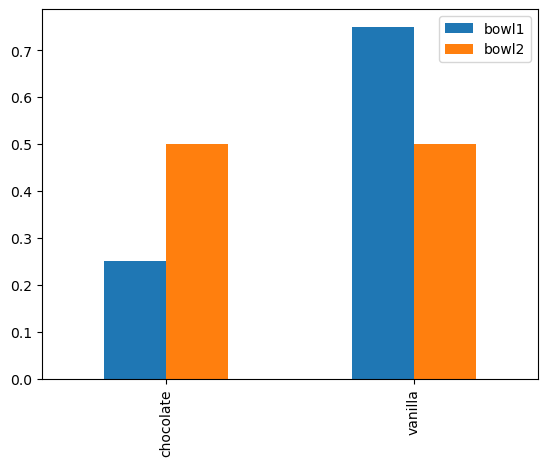

In [18]:
df_.plot(kind='bar')

### 전체 쿠키에 대한 확률을 만들기

In [19]:
cookie = lea.pmf({'vanilla': 50, 'chocolate':30}, prob_type='r')

In [20]:
cookie

chocolate : 3/8
vanilla   : 5/8

In [21]:
# 바닐라 확률 구하기
cookie.p('vanilla')

5/8

### 바닐라 쿠키 전체에서 그릇 1에 해당하는 경우의 확률 구하기

* 베이지안 확률에서 구하는 사후 확률은 바닐라 쿠키 전체에서 그릇 1에 해당하는 경우를 구하는 것이다.
* 각각의 확률을 별도로 구성해서(bowl1, bowl2, cookie) 조건부 확률로 표시되지 않지만, 
* 전체 쿠키 중에서 바닐라를 선택할 확률을 구하고 그중에서 그릇 1이 선택될 때 그 안에 바닐라 쿠키의 비율을 구하면 된다.

In [22]:
# 그릇 1에서 바닐라 쿠키를 선택할 확률
bowl1.p('V')

3/4

In [23]:
# 그릇 1, 그릇 2 중에서 그릇 1을 선택할 확률
bowl.p('bowl1')

1/2

In [24]:
# 바닐라 쿠키가 그릇 1에 있을 확률, 두 사건이 연속으로 일어나므로 곱한다.
bowl1.p('V') * bowl.p('bowl1')

3/8

In [25]:
# 바닐라 쿠키를 선택했을 때 바닐라 쿠키가 그릇 1에 있을 확률을 구한다.실제 구하려는 확률이다.
bowl1.p('V') * bowl.p('bowl1') / cookie.p('vanilla')

3/5

### 확률 분포표로 확률 계산하기

In [26]:
# 변수에 논리값 할당
(T, F) = (True, False)

In [27]:
# 2개의 그릇에 2종류의 쿠키를 넣어서 4개로 구분해 쿠키를 표시하였다.
# (1, 2, 3, 4) = (그릇1, 그릇2, 바닐라 쿠키, 초콜릿 쿠키)
# (T, F, T, F) = 그릇 1 = True, 바닐라 쿠키 = True 즉, 그릇 1의 바닐라 쿠키
# (T, F, F, T) = 그릇 1 = True, 초콜릿 쿠키 = True 즉, 그릇 1의 초콜릿 쿠키
_bowl = lea.pmf({(T, F, T, F): 30, (T, F, F, T): 10, (F, T, T, F):20, (F, T, F, T):20},
                normalization=False, prob_type='r')

In [28]:
_bowl

(False, True , False, True ) : 20
(False, True , True , False) : 20
(True , False, False, True ) : 10
(True , False, True , False) : 30

In [29]:
# 논리값에 대한 열이름 부여, as_joint 메소드로 그릇의 이름과 쿠키의 이름을 부여
bowl = _bowl.as_joint('bowl1', 'bowl2', 'vanilla', 'chocolate')

In [30]:
bowl

 bowl1, bowl2, vanilla, chocolate
(False, True , False  , True     ) : 2/8
(False, True , True   , False    ) : 2/8
(True , False, False  , True     ) : 1/8
(True , False, True   , False    ) : 3/8

In [31]:
# 그릇의 쿠키의 표시가 명확한지 support 속성으로 확인
bowl.support

(_(bowl1=False, bowl2=True, vanilla=False, chocolate=True),
 _(bowl1=False, bowl2=True, vanilla=True, chocolate=False),
 _(bowl1=True, bowl2=False, vanilla=False, chocolate=True),
 _(bowl1=True, bowl2=False, vanilla=True, chocolate=False))

In [32]:
# 전체 분포에서 해당하는 전체 확률을 가져왔기 때문에 실제 원하는 값을 구한 결과는 아님
lea.P(bowl.bowl1 & bowl.vanilla)

3/8

In [33]:
# 확률분포의 전체 확률 확인
bowl.ps

(1/4, 1/4, 1/8, 3/8)

In [34]:
# 바닐라 쿠키일 경우의 조건부 확률을 구한다.
bowl.given(bowl.vanilla)

 bowl1, bowl2, vanilla, chocolate
(False, True , True   , False    ) : 2/5
(True , False, True   , False    ) : 3/5

In [35]:
# 전체 분포에서 그릇 1인 확률
lea.P(bowl.bowl1)

1/2

In [36]:
# 그릇 1이 바닐라 쿠키일 경우의 확률
# 사후 확률로 조건부 확률을 given으로 지정하고 그중에서 그릇 1이 선택될 확률이다.
# 엄밀히 말하면, 바닐라 쿠키를 선택했을 때 바닐라 쿠키가 그릇 1에 있을 확률을 구한다.실제 구하려는 확률이다.
lea.P(bowl.bowl1.given(bowl.vanilla))

3/5